# Week 1

## Overview
As explained in during the in-class lecture, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## AI and this class

This class is *AI first*. This means that you're allowed to use LLMs to help in answering the questions. 

In fact, you could use a really good model to do most of the work for you. As I discuss during the lecture **you shouldn't always do that**. Part of the point of being here is learning how to do certain things using your human brain. To make you better at thinking. If you use the AI for everything you will get worse at thinking. 

And don't forget that the whole point of going to University in the first place is to get better at thinking. So if you just use the AI you're defeating the purpose of spending time at DTU. You'll be wasting your life.

On the other hand, there are many things that it's not important to do on your own. And how the h#ll do you tell what's what? How do you know when to use LLMs and when not to?

<div class="alert alert-block alert-info">
To be of assistance, I've designed a system of blue boxes that I use to clarify this issue. I basically tell you when LLMs are OK and when they don't! Awesome, right?
</div>

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science (not necesarily a good one, see notes on "dark sides" below). 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. (Here's a [direct YouTube link](https://www.youtube.com/watch?v=YxvyeaL7NEM&t=19s) in case the embedded video give you trouble, but note that if you watch directly from YouTube, you will see ads.)

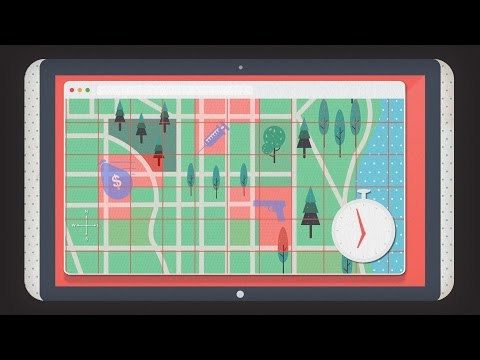

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM', width=800, height=450)

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article.

<div class="alert alert-block alert-info">
You might feel tempted to use an LLM to answer the questions above. Don't! The goal of taking the class is to get smarter, and you won't get smarter if someone else does the work for you. So think! Read the text and write down your own thoughts. Then when you're done, you can use and LLM to make the answers better.
</div>

[Link to article from 2022](https://medium.com/@Vera_Kerber/a-brief-history-of-predictive-policing-in-the-united-states-ec3568e5c42c) describing todays situation.

- According to the article, the information within the field is a bit sparse. But it seems promising at that point. However, discussing the pitfalls it may include.
- A feeling of surveiliance. Incrase in bias in relation to crimes. Looking at todays situation, Black Lives Matter could be a result of using such technologies to predict crime.

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Part 2: Load some crime-data into your Jupyter notebook

The data we will be working with is perfect for `pandas`, so a good approach is to go to [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2025/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't and figure out how to load data into `pandas' means. 

But this course is not about programming orthdoxy, so if you don't like `pandas`, you're free to use other solutions. There are many other ways to load data into Python, e.g. using dictionaries.

> *Exercise*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. **I would like you to get both datafiles and combine them**. Only use complete years, so the dataset should start Jan 1st and end Dec 31st.
>    * **Hint 1**: Combining these two datasets is one of the hardest things you'll need to do today, so I recommend you save this merger to the end of the lecture. Instead, just work with the 2003-2018 dataset and get the plots going. Then once you've roughly sorted out all the plots, etc, come back and and get the full dataset going.
>    * **Hint 2**: You're going to want to drop a lot of the columns. Make sure you keep at least information related to crime type (category/incident-category), time, and location (both GPS and district names will be useful).
>    * **Hint 3**: For crime types, the upper/lower case conventions are not consistent across the files, and you might need to match categories with slightly different names across the two datasets. For example there are 37 crime categories in the oldest dataset and 49 in the second dataset, so the merger is not trivial to make. Use your own judgment and  **support from an LLM** to decide how to merge.
> * You are allowed to use and LLM to help you combine the files and clean the data. I recommend parsing the files and getting rid of fields you don't think you'll need in the future.
> * To get your cleaned file into `pandas`, you can use the tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/). If you want to try your luck without `pandas`, you can use the `csv` package to load the file.
> * Now generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

<div class="alert alert-block alert-info">
As noted above, you're allowed to use LLMs as much as you like for this exercise.
</div>

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2 The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Did you run into categories changing across your two data periods? If yes, think about how to deal with those issues. There's no right answer but reflect on your decisions. (And don't spend too much energy on this, since we'll only be working on a subset of the crimes long-term, see *Focus Crimes* below.)
> * Create a bar-plot over crime occurrences. This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). I created one for the 2003-2018 dataset that's displayed below (so yours doesn't have to look exactly like mine - the important thing is that you clearly communicate the information in the dataset).
> 
> <div>
> <img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
> </div>

<div class="alert alert-block alert-info">
As above, you're allowed to use LLMs as much as you like for this exercise.
</div>

In [196]:
# --- Exercise 1
file_2003_2018 = './res/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv'
file_2018_present = './res/Police_Department_Incident_Reports__2018_to_Present_20250204.csv'


columns_to_keep_18_present = [
    "Incident Date", "Incident Day of Week", "Incident Time",
    "Incident Category", "Incident Subcategory", "Point"
]

columns_to_keep_03_18 = [
    "Category", "Descript", "DayOfWeek", "Date", "Time", "location"
]

# Load datasets using only relevant columns
crime_fst_raw = pd.read_csv(file_2003_2018, usecols=columns_to_keep_03_18, parse_dates=['Date'])
crime_snd_raw = pd.read_csv(file_2018_present, usecols=columns_to_keep_18_present,  parse_dates=['Incident Date'])

In [197]:
# Inspect the datasets
crime_fst_raw.head()

renamed_cols = {
    "Incident Category" : "Category", 
    "Incident Subcategory": "Descript", 
    "Incident Day of Week" : "DayOfWeek", 
    "Incident Date" : "Date", 
    "Incident Time" : "Time", 
    "Point":    "location"
}

crime_snd_raw = crime_snd_raw.rename(columns=renamed_cols)
crime_snd_raw

,Date,Time,DayOfWeek,Category,Descript,location
0,2023-03-01,05:02,Wednesday,Larceny Theft,Larceny Theft - Other,NaN
1,2023-03-13,10:59,Monday,Recovered Vehicle,Recovered Vehicle,NaN
2,2023-03-14,18:44,Tuesday,Recovered Vehicle,Recovered Vehicle,NaN
3,2023-02-15,03:00,Wednesday,Larceny Theft,Larceny Theft - Other,NaN
4,2023-03-13,11:26,Monday,Larceny Theft,Larceny - From Vehicle,NaN
...,...,...,...,...,...,...
928750,2023-03-21,23:00,Tuesday,Missing Person,Missing Adult,POINT (-122.41438190897125 37.792784068921534)
928751,2023-03-22,13:30,Wednesday,Robbery,Robbery - Commercial,POINT (-122.40633623830558 37.75300402962228)
928752,2023-03-21,21:19,Tuesday,Non-Criminal,Non-Criminal,POINT (-122.45266472219633 37.70880633652071)
928753,2023-03-22,15:28,Wednesday,Larceny Theft,Larceny Theft - From Building,POINT (-122.40557374633903 37.790565236529574)


In [198]:
# Combine the datasets
# The datasets contain different categories for the same crime, i.e. ROBBERY and Robbery. This should be cleaned before combined.
# See ConCatDataHelpW1
df_combined = pd.concat([crime_fst_raw, crime_snd_raw])
df_combined

,Category,Descript,DayOfWeek,Date,Time,location
0,ROBBERY,"ROBBERY, BODILY FORCE",Monday,2004-11-22,17:50,POINT (-122.420084075249 37.7083109744362)
1,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,2005-10-18,20:00,POINT (-120.50000000000001 90)
2,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2004-02-15,02:00,POINT (-120.50000000000001 90)
3,ARSON,ARSON,Friday,2011-02-18,05:27,POINT (-122.43622001281001 37.7243766140428)
4,ASSAULT,BATTERY,Sunday,2010-11-21,17:00,POINT (-122.410541166987 37.7709130566165)
...,...,...,...,...,...,...
928750,Missing Person,Missing Adult,Tuesday,2023-03-21,23:00,POINT (-122.41438190897125 37.792784068921534)
928751,Robbery,Robbery - Commercial,Wednesday,2023-03-22,13:30,POINT (-122.40633623830558 37.75300402962228)
928752,Non-Criminal,Non-Criminal,Tuesday,2023-03-21,21:19,POINT (-122.45266472219633 37.70880633652071)
928753,Larceny Theft,Larceny Theft - From Building,Wednesday,2023-03-22,15:28,POINT (-122.40557374633903 37.790565236529574)


In [201]:
# -- Exercise 1: Statistics

# Report the total number of crimes in the dataset.
print(f"Total number of crimes in the dataset: {crime_fst_raw.size}\n")
# List the various categories of crime. How many are there?
print(f"List of various categories of crime: \n{crime_fst_raw.Category.unique()}")
print(f"There are {crime_fst_raw.Category.nunique()} in total\n")

# List the number of crimes in each category.
print(f"Number of crimes in each category: \n{crime_fst_raw.Category.value_counts()}")


Total number of crimes in the dataset: 12777150

List of various categories of crime: 
['ROBBERY' 'VEHICLE THEFT' 'ARSON' 'ASSAULT' 'TRESPASS' 'BURGLARY'
 'LARCENY/THEFT' 'WARRANTS' 'OTHER OFFENSES' 'DRUG/NARCOTIC'
 'SUSPICIOUS OCC' 'LIQUOR LAWS' 'VANDALISM' 'WEAPON LAWS' 'NON-CRIMINAL'
 'MISSING PERSON' 'FRAUD' 'SEX OFFENSES, FORCIBLE' 'SECONDARY CODES'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'KIDNAPPING'
 'FORGERY/COUNTERFEITING' 'PROSTITUTION' 'DRUNKENNESS' 'BAD CHECKS'
 'DRIVING UNDER THE INFLUENCE' 'LOITERING' 'STOLEN PROPERTY' 'SUICIDE'
 'BRIBERY' 'EXTORTION' 'EMBEZZLEMENT' 'GAMBLING' 'PORNOGRAPHY/OBSCENE MAT'
 'SEX OFFENSES, NON FORCIBLE' 'TREA']
There are 37 in total

Number of crimes in each category: 
Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WA

Most common category of crime: LARCENY/THEFT
Least frequently category of crime: TREA


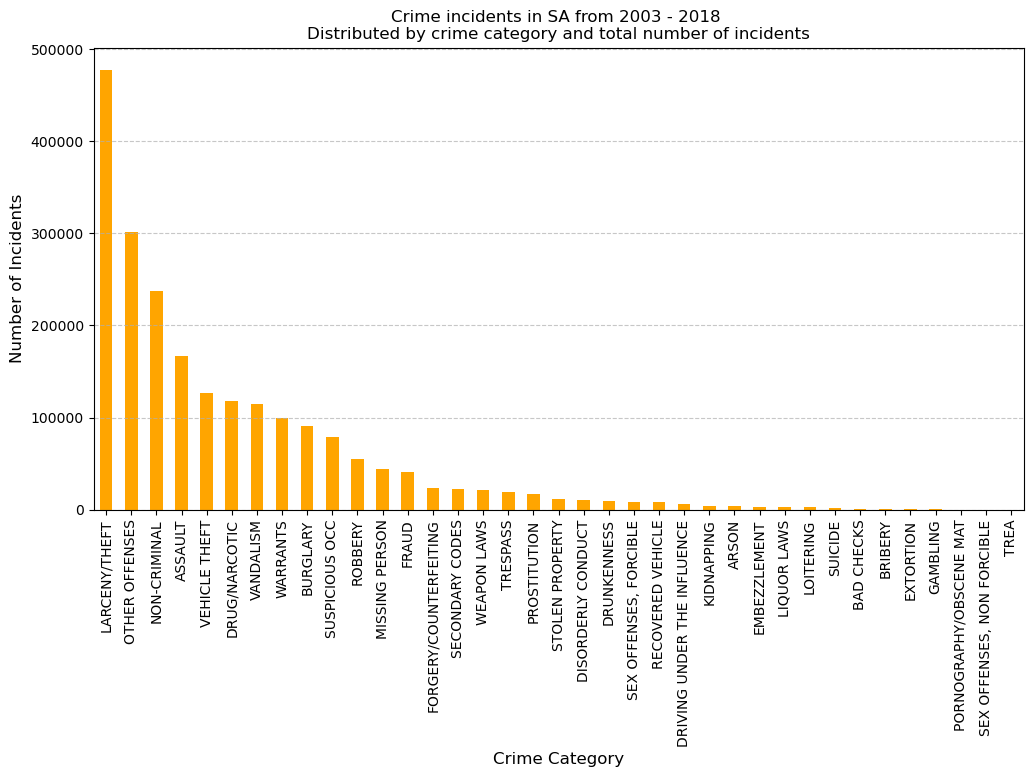

In [102]:
# --- Exercise 2:

print(f"Most common category of crime: {crime_fst_raw.Category.value_counts().idxmax()}")
print(f"Least frequently category of crime: {crime_fst_raw.Category.value_counts().idxmin()}")

# If categories are changing within the two datasets, it would make sense to rename the category name so that they match 
# (for instance if larcency and theft are in two separate one dataset, but combined in the other, consider mapping the two separate ones into a single 
# combined one in the combined dataset)

crime_fst_categories = crime_fst_raw.Category.value_counts()

plt.figure(figsize=(12, 6))  # Set figure size
crime_fst_categories.plot(kind="bar", color="orange")

plt.title("Crime incidents in SA from 2003 - 2018 \nDistributed by crime category and total number of incidents")
plt.xlabel("Crime Category", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes?.
> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

Year with most crimes: 2015. Count: 151459
Year with fewest crimes: 2018. Count: 45059


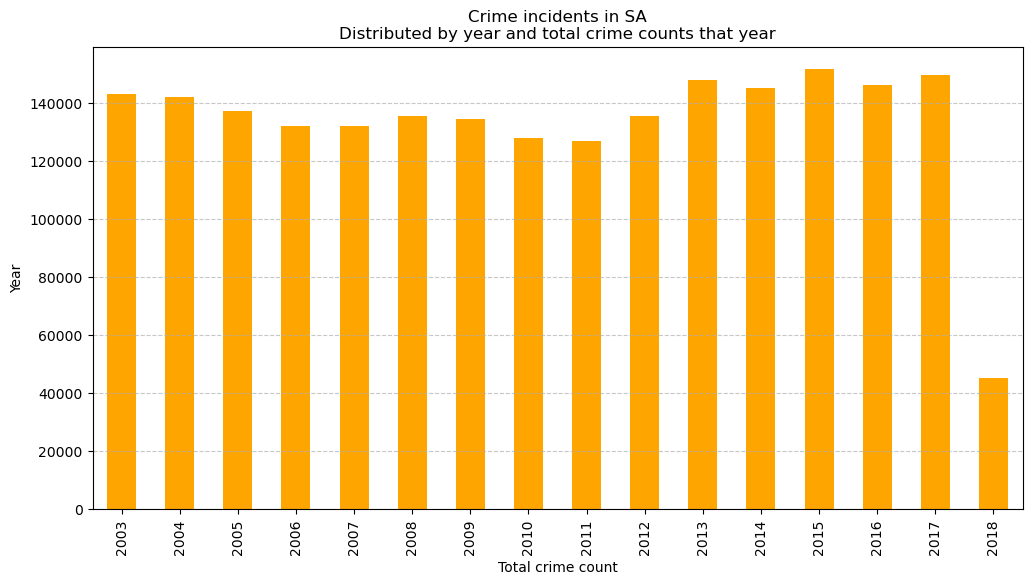

In [174]:
# --- Exercise 3

crimes_as_years = crime_fst_raw.Date.dt.year.value_counts().sort_index()

print(f"Year with most crimes: {(crimes_as_years.idxmax())}. Count: {crimes_as_years.max()}")
print(f"Year with fewest crimes: {(crimes_as_years.idxmin())}. Count: {crimes_as_years.min()}")

plt.figure(figsize=(12, 6))
crimes_as_years.plot(kind="bar", color="orange")

plt.title("Crime incidents in SA\nDistributed by year and total crime counts that year")
plt.xlabel("Total crime count")
plt.ylabel("Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [139]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

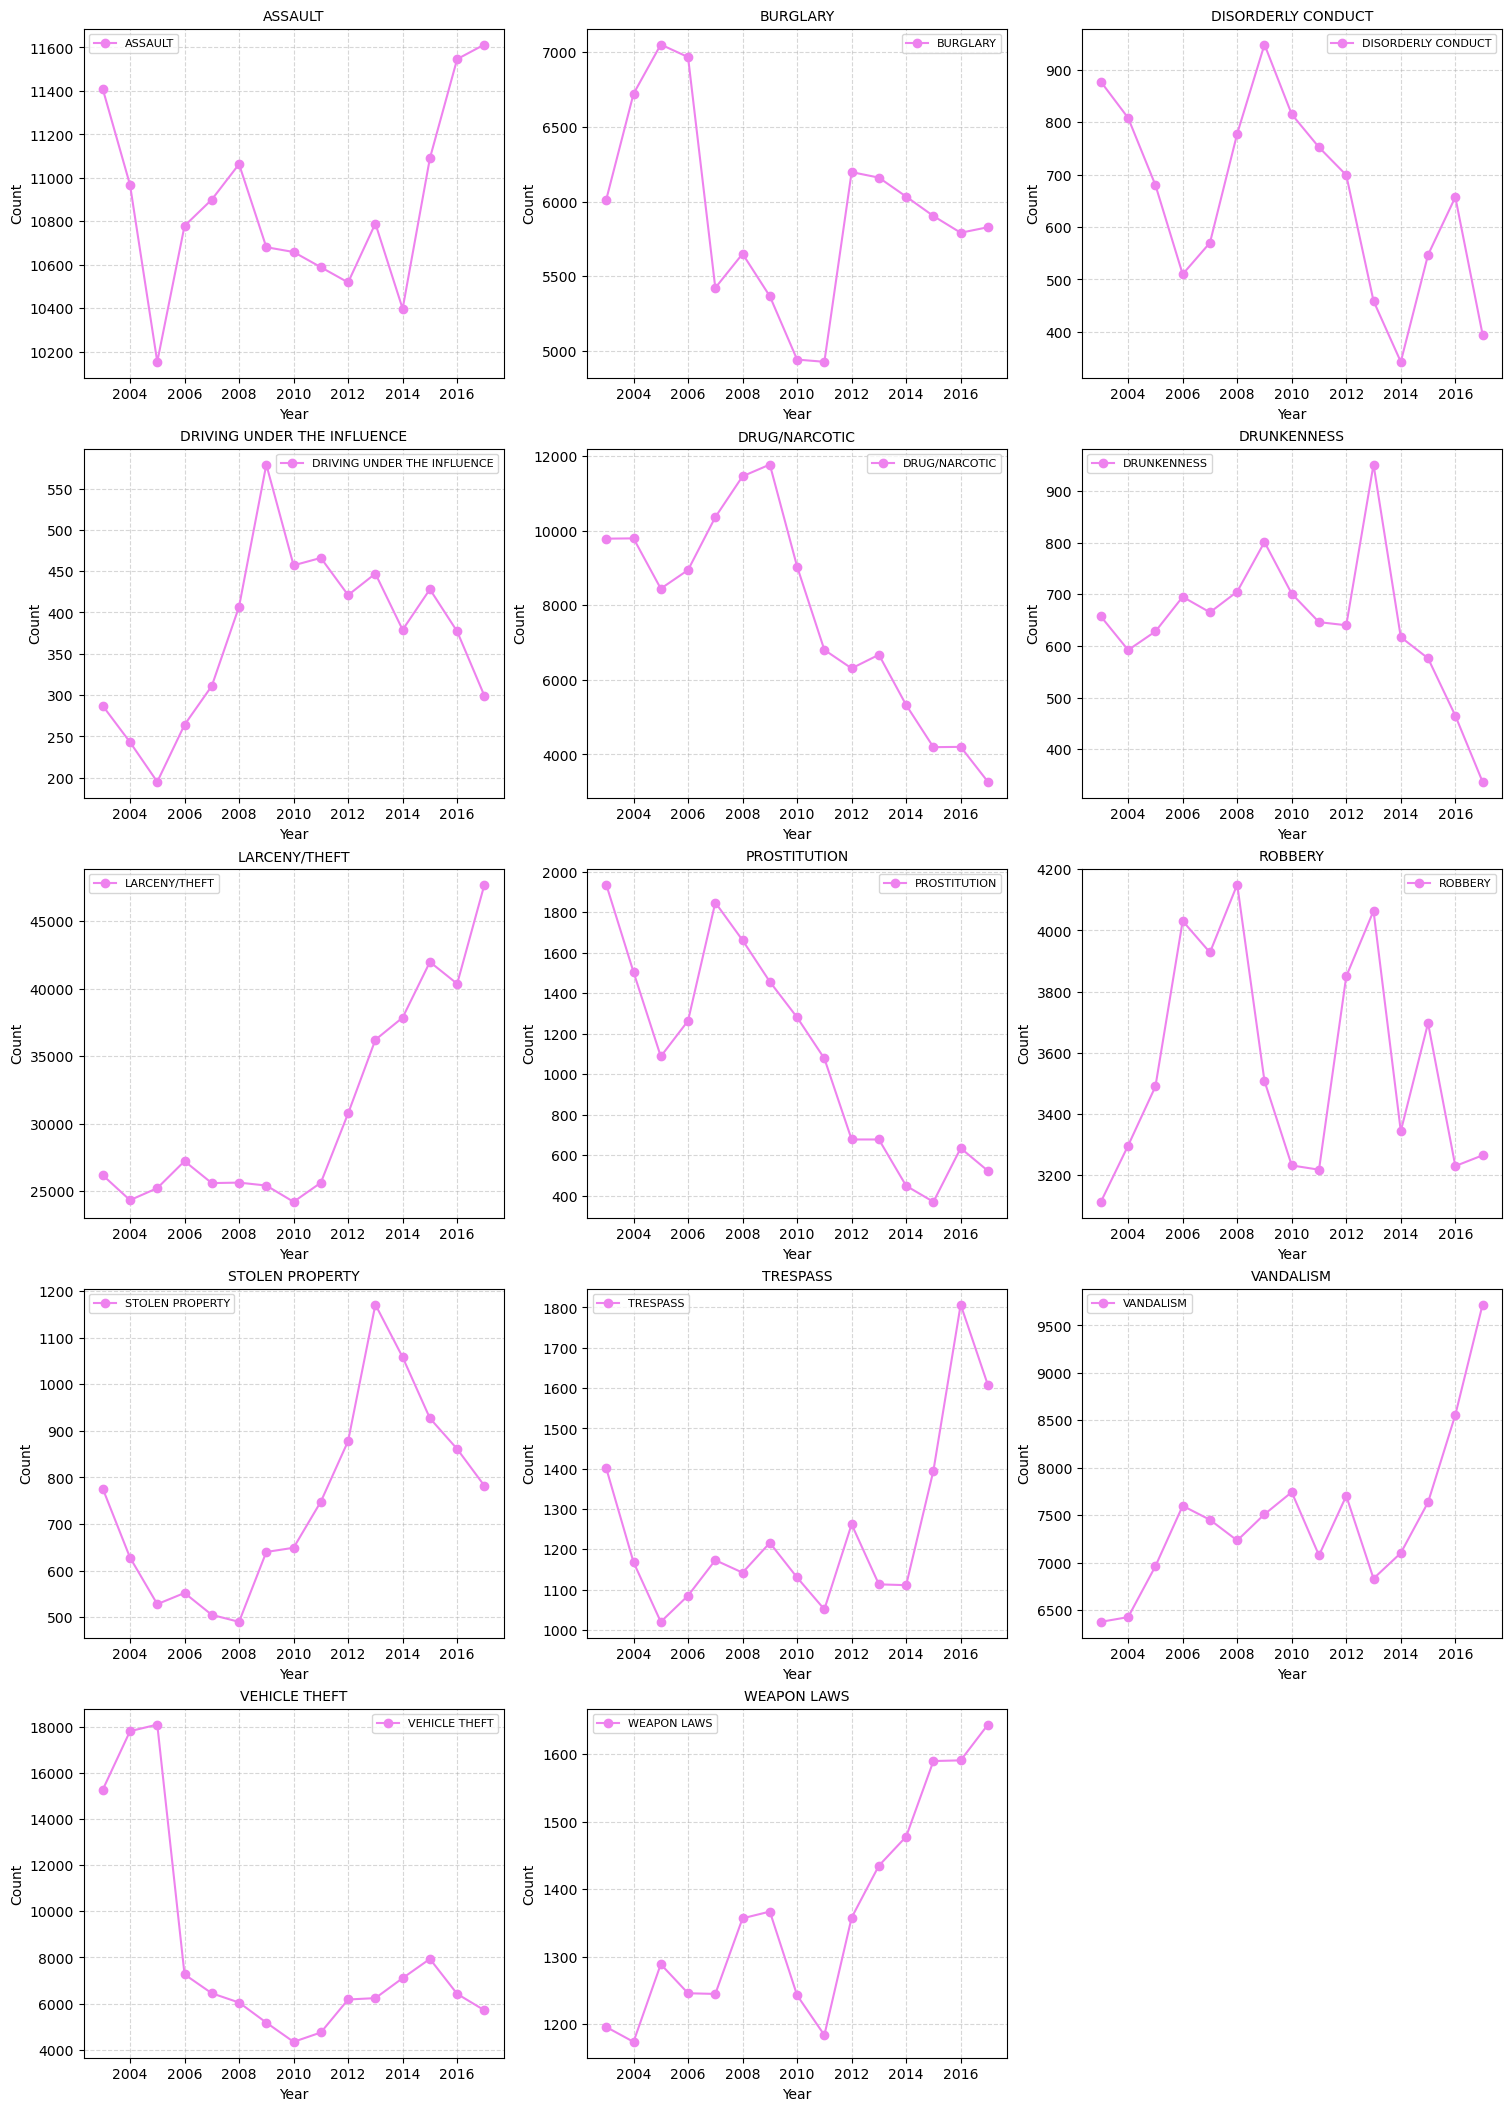

In [ ]:
# --- Exercise 3: Focus Plots
crime_fst_raw["Year"] = crime_fst_raw["Date"].dt.year

# Filter dataset to only contain focus crimes
crime_fst_filtered = crime_fst_raw[crime_fst_raw["Category"].isin(focuscrimes)]

# Group by year and category, then count occurrences
category_trends = crime_fst_filtered.groupby(["Year", "Category"]).size().unstack()

# Remove 2018 year as it doesn't contain as many entries as the others
category_trends = category_trends.drop(category_trends.index.max()) 

# Create subplots
num_categories = len(category_trends.columns)
fig, axes = plt.subplots(nrows=num_categories // 3 + 1, ncols=3, figsize=(15, num_categories * 1.5), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each crime category in a separate subplot
for i, category in enumerate(category_trends.columns):
    axes[i].plot(category_trends.index, category_trends[category], marker="o", linestyle="-", label=category, color="violet")
    axes[i].set_title(category, fontsize=10)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Count")
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].legend(fontsize=8)
    

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

My plots (with only 2003-2018 data) look like this for the 14 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimesYearCategory.png)
    
Note that names of each plot explain what you're looking at. And that when you have many subplots it's OK that you don't label every single axis. You may simply put axes on the bottom / side that are common for all plots.) 

**What I want you to notice is that by "drilling into" the data, exploring by category patterns begin to emerge**. The overall crime-counts don't tell us much, but as we interrogate the data, we start to learn about what's going on. We will continue this exploration next week.

> *Exercise 3 (continued)*
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html).

<div class="alert alert-block alert-info">
As in the other exercises, you're allowed to use LLMs as much as you like for creating the plots. But do use your own brain for commenting on the trends in the plots.
</div>

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default plots are quite boring.

# Comments

1. Drug / narcotic has dropped since 2009
2. Prostitution has dropped since 2009
3. Larcency / theft has increased since 2010